# PROJECT TWO: DATA GATHERING,ASSESSING,CLEANING AND ANALYSIS 

## Introduction
The aim of this notebook is to demonstrate skills in the gathering of data through a variety of ways,assessing its quality and tidiness,cleaning and analysis.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
import requests
import json

## Gathering Data
 

In this stage, two datasets relating to the WeRateDogs Twitter account will be gathered and imported into the Jupyter Notebook. These are; the twitter archive and the Twitter image predictions. The WeRateDogs Twitter archive is cleaned up version of data  downloaded  WERATEDOGS Twitter account and partially cleaned by  Udacity. 

The second dataset was the image prediction dataset. It contains the results of the image recognition algorithm to identify the dog breeds In the images from the cleaned Twitter archive.The third dataset will be querried from the WERATEDOG twiiter account to generate data on the total number of retweets and likes  for each tweet in the twitter archive.This will be achived through the use of Twitter's API,Tweepy. 

In [2]:
## Loading the twiiter achive data
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter.shape

(2356, 17)

In [3]:
## Gathering the dog image prediction data using the requests library
url  = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
d = requests.get(url)
open('image_prediction.tsv','wb').write(d.content)

image_pred = pd.read_csv('image_prediction.tsv',sep = '\t')
image_pred.shape


(2075, 12)

In [ ]:
## we need to collect the tweets for the tweet id in the tweet archive file
tweet_ids = twitter.tweet_id

## twitter authorisation parameters.
consumer_key = '************'
consumer_secret = '******************'
access_token = '***********************'
access_token_secret = '*********************'

## function to coollect the tweets
auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)

API = tweepy.API(auth, wait_on_rate_limit = True)
## query the API for the tweets contained in the tweet_id array
errors = {}## to record all the extraction process
success = 0
fail = 0
with open('tweet_json.txt' , 'w') as tweetfile:
    for tweet in tweet_ids:
            try:
                ## store the data for sucessful extraction process
                tweet = API.get_status(tweet,tweet_mode = 'Extended')
                json.dump(tweet._json, tweetfile)
                tweetfile.write('\n')
                success +=1 
                print(success)
            except tweepy.errors.TweepyException as e:
                errors[tweet] = e
print(errors)
 
## reading in the data line by line to store the required values as a list
with open('tweet_json.txt' ,'r') as tweet_json:
    tweet_list= []
    for line in tweet_json:
        text = line.replace('\n', '') 
        tweet_list.append(text)
tweet_id = []
total_likes= []
total_retweets = []
tweet_data =  {'tweet_id': [],'total_likes':[],'total_retweets':[]}
file_length = len(tweet_list)
for i in range(file_length):
    tweet_dict = json.loads(tweet_list[i])
    tweet_id.append(tweet_dict['id'])
    total_likes.append(tweet_dict['favorite_count'])
    total_retweets.append(tweet_dict['retweet_count'])
                    
tweet_data.update({'tweet_id': tweet_id,'total_likes':total_likes,'total_retweets':total_retweets})
 ## convert to dataframe
tweet_df = pd.DataFrame(tweet_data)
tweet_df.to_csv('tweet_df.csv',index = False)
        
tweet_df.head() 

In [4]:
tweet_df = pd.read_csv("tweet_df.csv")

In [5]:
tweet_df.shape

(2261, 3)

# ASSESS
In this section,all the data will be assessed for data quality and tidines issues.This assessment will employ both visual and programmatic techniques.

In [6]:
## Visual inspection of the Twitter dataset

twitter.sample(50)



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
350,831552930092285952,NaN,NaN,2017-02-14 17:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dutch. He dressed up as his favorite e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831552930...,13,10,Dutch,None,None,None,None
1687,681579835668455424,NaN,NaN,2015-12-28 20:57:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Apollo. He thought you weren't coming ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681579835...,8,10,Apollo,None,None,None,None
1913,674372068062928900,NaN,NaN,2015-12-08 23:36:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chesney. On the outside he stays calm &am...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674372068...,10,10,Chesney,None,None,None,None
1344,704499785726889984,NaN,NaN,2016-03-01 02:53:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you wake up from a long nap and have no i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704499785...,12,10,None,None,None,None,None
2227,668268907921326080,NaN,NaN,2015-11-22 03:24:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Azerbaijani Buttermilk named G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668268907...,10,10,None,None,None,None,None
1521,690690673629138944,NaN,NaN,2016-01-23 00:21:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cedrick. He's a spookster. Did me a di...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690690673...,10,10,Cedrick,None,None,None,None
2214,668544745690562560,NaN,NaN,2015-11-22 21:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",It is an honor to rate this pup. He is a Snork...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668544745...,10,10,None,None,None,None,None
1953,673662677122719744,NaN,NaN,2015-12-07 00:37:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kendall. 12/10 would cuddle the hell o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673662677...,12,10,Kendall,None,None,None,None
2175,669214165781868544,NaN,NaN,2015-11-24 18:01:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jaspers. He is a northeastern Gillette...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669214165...,10,10,Jaspers,None,None,None,None
1281,708810915978854401,NaN,NaN,2016-03-13 00:24:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He's a wonderful father to his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708810915...,10,10,Mister,None,None,None,None


In [7]:
## rating extracted from a retweet
twitter[543:544]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
543,805958939288408065,NaN,NaN,2016-12-06 02:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Penny. She fought a bee...,7.827226e+17,4.196984e+09,2016-10-02 23:23:04 +0000,https://twitter.com/dog_rates/status/782722598...,10,10,Penny,None,None,None,None


In [8]:
##Visual inspection of the image prediction
image_pred.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True
1360,761004547850530816,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
380,673295268553605120,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,1,golden_retriever,0.889241,True,Labrador_retriever,0.064683,True,Great_Pyrenees,0.012613,True
1186,739238157791694849,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
1901,851591660324737024,https://pbs.twimg.com/media/C9F2FG5WAAAJ0iN.jpg,1,Cardigan,0.394507,True,Chihuahua,0.077254,True,French_bulldog,0.076559,True
488,675517828909424640,https://pbs.twimg.com/media/CV_r3v4VAAALvwg.jpg,1,Scottish_deerhound,0.240591,True,groenendael,0.156916,True,flat-coated_retriever,0.090899,True
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,Rhodesian_ridgeback,0.008073,True,pug,0.005571,True
1833,836753516572119041,https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg,1,mortarboard,0.936882,False,academic_gown,0.020815,False,schipperke,0.011564,True
1882,847157206088847362,https://pbs.twimg.com/media/C8G0_CMWsAAjjAY.jpg,2,Staffordshire_bullterrier,0.219609,True,American_Staffordshire_terrier,0.178671,True,pug,0.123271,True
428,674262580978937856,https://pbs.twimg.com/media/CVt2PawWIAEUkqW.jpg,1,Greater_Swiss_Mountain_dog,0.519428,True,boxer,0.121500,True,Staffordshire_bullterrier,0.114498,True


In [9]:
# visual inpection of the tweet_df dataset
tweet_df.sample(50)

,tweet_id,total_likes,total_retweets
1879,673352124999274496,1495,475
2182,667453023279554560,279,74
1758,675891555769696257,1923,765
648,789628658055020548,7073,1646
350,828770345708580865,24088,5394
1924,672248013293752320,1530,524
2190,667200525029539841,544,228
109,870726314365509632,105,3
352,828650029636317184,8947,1237
1275,705239209544720384,2774,678


### Programmatic assessment

In [10]:
## check datatypes and missing values in all datasets
print('TWEET_DF')
tweet_df.info()

print('TWITTER')
twitter.info()
print('IMAGE PREDICTION')
image_pred.info()

TWEET_DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2261 non-null   int64
 1   total_likes     2261 non-null   int64
 2   total_retweets  2261 non-null   int64
dtypes: int64(3)
memory usage: 53.1 KB
TWITTER
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7 

In [11]:
## check for duplicated rows
tweet_df.duplicated().sum()


0

In [12]:
twitter.duplicated().sum()

0

In [13]:
image_pred.duplicated().sum()

0

In [14]:
## description of numerical variables

twitter.describe()



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
twitter.name.sample(8)

569      Ronnie
1558     Pubert
1252    Staniel
1386    Vincent
805        Finn
1700      Ozzie
1872      Coops
639        None
Name: name, dtype: object

In [17]:
twitter[['text','rating_numerator']][46:47]

,text,rating_numerator
46,Meet Grizzwald. He may be the floofiest floofe...,13


In [18]:
cols = pd.Series(list(image_pred) + list(twitter) + list(tweet_df))
cols[cols.duplicated()]

12    tweet_id
29    tweet_id
dtype: object


###  Quality issues
        
        1). Missing variables in the columns;in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,
             retweeted_status_timestamp in the twitter dataset.
        2). Erroneous values in the numerator rating e.g the tweet in row 46 has numerator of 13.5 but was extracted as 5 in    the numerator rating column.
        3). Image_num  in the image_prediction dataset is composed of 4 integers that may not be neeeded.
               
        5). Erroneous datatypes; a). tweet_df :tweet_id(int)
                                 b). twitter  :n_reply_to_status_id,in_reply_to_user_id, timestamp,for all the                                                      datasets,timestamp,retweeted_status_id,retweeted_status_timestamp,doggo, 
                                     floofer,pupper,puppo in the twitter dataset.
                                c). tweet_id in image_pred dataset.  
                                
        6).  Twitter dataset contains retweeted tweets.
        7).  Tweet_id duplicated in all the datasets.
        8).  Missing values in the master dataset.
        9).  The dog stages has missing variables recorded as none which might bring errors during the merging step.
        10).  Some  of the column names are not descriptive enough of the observations contained in them e.g p1,p1,p3.
           
                                
        
### Tidiness issues
        
        1). The dog stages is made up of four columns;Doggo,floofer,pupper and puppo.These should be condensed into one column.
        2). One data tables needed instead of three.

#  DATA CLEANING

This section will clean all the issues idenitifed during the previous stage.The define-code-test framweork will be used.

In [20]:
## make copies of each of the datasets
twitter_copy = twitter.copy()
tweet_copy = tweet_df.copy()
predict_copy = image_pred.copy()


### Define
Remove all retweeted tweets in the twitter and tweet_df datasets.

### code

In [21]:
## extract  the Ids of the retweets as a list 
retweets = twitter_copy[twitter_copy.retweeted_status_timestamp.notnull()]
retweet_ids = retweets.tweet_id
retweet_ids
# eliminate retweets 
twitter_copy = twitter_copy[twitter_copy['retweeted_status_timestamp'].isna()]
len(twitter_copy)
len(retweet_ids)

181

### Test

In [22]:
# confirm that the the number of rows has decreased by the rows in retweet ids.
assert len(twitter_copy) == len(twitter) - len(retweet_ids)

### Define
Drop all unnneccessary columns not needed for the analysis including those with chronic nulls.Columns include;`n_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_timestamp` in the twitter dataset.`denominator_rating` and `image_num` in the image_prediction dataset.This will also eliminate all reduntant variables and the the denominator_rating that contained some errors in some rows.

### Code

In [23]:
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp',
        'rating_denominator','source','retweeted_status_user_id',
        'retweeted_status_id','expanded_urls']
twitter_copy.drop(cols,axis = 1,inplace = True)
predict_copy.drop('img_num',axis = 1,inplace = True)

### test

In [24]:
## confirm columns removed
twitter_copy.info()
predict_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2175 non-null   int64 
 1   timestamp         2175 non-null   object
 2   text              2175 non-null   object
 3   rating_numerator  2175 non-null   int64 
 4   name              2175 non-null   object
 5   doggo             2175 non-null   object
 6   floofer           2175 non-null   object
 7   pupper            2175 non-null   object
 8   puppo             2175 non-null   object
dtypes: int64(2), object(7)
memory usage: 169.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   flo

### Define
Extract the numerator ratings afresh from the `text` column in `twitter` dataframe.Change the name to `ratings`,convert to float and drop the redundant numerator_rating column.This will eliminate erroneour variables in this column

### Code


In [25]:

twitter_copy['rating'] = twitter_copy.text.str.extract(r'(\d+\.*\d*\/\d+)',expand = False).str.split('/').str[0].astype('float')

## drop redundant col
twitter_copy.drop('rating_numerator',axis =1,inplace = True)

### test

In [26]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2175 non-null   int64  
 1   timestamp  2175 non-null   object 
 2   text       2175 non-null   object 
 3   name       2175 non-null   object 
 4   doggo      2175 non-null   object 
 5   floofer    2175 non-null   object 
 6   pupper     2175 non-null   object 
 7   puppo      2175 non-null   object 
 8   rating     2175 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 169.9+ KB


### Define

Merge the twitter_copy and tweet_copy with the predict_copy dataset.This will eliminate messy three datasets by combining them into one.It will also eliminate the presence of duplicates of the tweet_id which occurred by having the three tbles as separate.

### Test

In [27]:
df_merged= pd.merge(predict_copy, twitter_copy, on=['tweet_id'], how='left')
tweets_merged=  pd.merge(df_merged,tweet_copy,on = ['tweet_id'],how = 'left')


### Test

In [28]:
tweets_merged.sample(5)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,...,timestamp,text,name,doggo,floofer,pupper,puppo,rating,total_likes,total_retweets
377,673213039743795200,https://pbs.twimg.com/media/CVe7r7QVEAAc4Bg.jpg,schipperke,0.888082,True,groenendael,0.047727,True,kelpie,0.041398,...,2015-12-05 18:51:11 +0000,This is Dexter. He just got some big news. 10/...,Dexter,None,None,None,None,10.0,1973.0,724.0
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,...,2017-07-25 01:55:32 +0000,Here's a puppo that seems to be on the fence a...,None,None,None,None,puppo,13.0,42004.0,8337.0
1684,814153002265309185,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,golden_retriever,0.490068,True,Labrador_retriever,0.291956,True,chow,0.072475,...,2016-12-28 16:56:16 +0000,This is Oshie. He's ready to party. Bought tha...,Oshie,None,None,None,None,12.0,27228.0,8104.0
1948,862831371563274240,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,Australian_terrier,0.207281,True,Irish_terrier,0.156296,True,German_shepherd,0.123536,...,2017-05-12 00:46:44 +0000,This is Zooey. She's the world's biggest fan o...,Zooey,None,None,None,None,13.0,17214.0,4451.0
1339,758474966123810816,https://pbs.twimg.com/media/Coak48zWAAAhBxV.jpg,Pembroke,0.546145,True,Cardigan,0.244200,True,German_shepherd,0.100429,...,2016-07-28 01:31:38 +0000,This is Brandonald. He accidentally opened the...,Brandonald,None,None,None,None,11.0,3551.0,913.0


In [29]:
## confirm length
tweets_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2075 non-null   int64  
 1   jpg_url         2075 non-null   object 
 2   p1              2075 non-null   object 
 3   p1_conf         2075 non-null   float64
 4   p1_dog          2075 non-null   bool   
 5   p2              2075 non-null   object 
 6   p2_conf         2075 non-null   float64
 7   p2_dog          2075 non-null   bool   
 8   p3              2075 non-null   object 
 9   p3_conf         2075 non-null   float64
 10  p3_dog          2075 non-null   bool   
 11  timestamp       1994 non-null   object 
 12  text            1994 non-null   object 
 13  name            1994 non-null   object 
 14  doggo           1994 non-null   object 
 15  floofer         1994 non-null   object 
 16  pupper          1994 non-null   object 
 17  puppo           1994 non-null   o

### Define
Fill all values with 'None' to Nan. Tidy the dataset by joining the `puppo`,`doggo`,`floofer` and `pupper` columns into one column known as `dog_class`.Drop all the redundant columns after this change.Change all NANs in this column back to 'None'.


### Code

In [30]:

## replace all None value to NAs.
cols = ['doggo','floofer','pupper','puppo']
for col in cols:
    tweets_merged[col].replace( 'None',np.nan,inplace = True)
## join the values in the doggo,puppo,doggo and pupper columns into a single column.
tweets_merged['dog_class'] = tweets_merged[tweets_merged.columns[15:19]].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis = 1)

## drop all redundant columns

tweets_merged.drop(cols, axis = 1,inplace = True)

## replace NANss in the dog_class column back to None
tweets_merged.dog_class.replace(r'^\s*$','None',inplace = True,regex = True)




### Test

In [31]:
## Confirm entries in dog_class

tweets_merged.dog_class.value_counts()

12.0            390
10.0            367
11.0            341
13.0            235
9.0             134
8.0              83
None             81
pupper,12.0      52
pupper,11.0      51
pupper,10.0      48
7.0              44
6.0              31
5.0              30
14.0             27
3.0              18
4.0              16
pupper,9.0       16
pupper,13.0      13
pupper,8.0       12
puppo,13.0       10
2.0               9
pupper,7.0        8
pupper,14.0       7
puppo,12.0        6
1.0               5
puppo,10.0        3
floofer,13.0      3
floofer,12.0      2
0.0               2
puppo,11.0        2
pupper,5.0        2
floofer,11.0      2
pupper,3.0        1
144.0             1
puppo,14.0        1
84.0              1
24.0              1
420.0             1
9.75              1
pupper,6.0        1
pupper,11.27      1
165.0             1
88.0              1
1776.0            1
11.26             1
44.0              1
puppo,9.0         1
121.0             1
143.0             1
floofer,10.0      1


In [32]:
tweets_merged.dog_class.sample(10)

113           10.0
377           10.0
1374          11.0
63            10.0
60            10.0
1284    pupper,8.0
1462          13.0
806            8.0
1978          13.0
1484          12.0
Name: dog_class, dtype: object

In [33]:
tweets_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2075 non-null   int64  
 1   jpg_url         2075 non-null   object 
 2   p1              2075 non-null   object 
 3   p1_conf         2075 non-null   float64
 4   p1_dog          2075 non-null   bool   
 5   p2              2075 non-null   object 
 6   p2_conf         2075 non-null   float64
 7   p2_dog          2075 non-null   bool   
 8   p3              2075 non-null   object 
 9   p3_conf         2075 non-null   float64
 10  p3_dog          2075 non-null   bool   
 11  timestamp       1994 non-null   object 
 12  text            1994 non-null   object 
 13  name            1994 non-null   object 
 14  rating          1994 non-null   float64
 15  total_likes     1996 non-null   float64
 16  total_retweets  1996 non-null   float64
 17  dog_class       2075 non-null   o

### Define 

Drop all missing values from the dataset.

### Code


In [34]:
tweets_merged.dropna(inplace =  True)

### Test


In [35]:
tweets_merged.isna().sum()

tweet_id          0
jpg_url           0
p1                0
p1_conf           0
p1_dog            0
p2                0
p2_conf           0
p2_dog            0
p3                0
p3_conf           0
p3_dog            0
timestamp         0
text              0
name              0
rating            0
total_likes       0
total_retweets    0
dog_class         0
dtype: int64


### Define
Change the datatypes of tweet_id from int to string,timestamp to datetime,total_likes and total_retweets to int and dog_class to categorical

### Code

In [36]:
### tweet_id to string
tweets_merged.tweet_id = tweets_merged.tweet_id.astype(str)
tweets_merged.timestamp = pd.to_datetime(tweets_merged.timestamp)
tweets_merged.total_likes = tweets_merged.total_likes.astype(int,errors = 'ignore')
tweets_merged.total_retweets = tweets_merged.total_retweets.astype(int,errors = 'ignore')
tweets_merged.dog_class = tweets_merged.dog_class.astype('category')

### Test


In [37]:
tweets_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1928 non-null   object             
 1   jpg_url         1928 non-null   object             
 2   p1              1928 non-null   object             
 3   p1_conf         1928 non-null   float64            
 4   p1_dog          1928 non-null   bool               
 5   p2              1928 non-null   object             
 6   p2_conf         1928 non-null   float64            
 7   p2_dog          1928 non-null   bool               
 8   p3              1928 non-null   object             
 9   p3_conf         1928 non-null   float64            
 10  p3_dog          1928 non-null   bool               
 11  timestamp       1928 non-null   datetime64[ns, UTC]
 12  text            1928 non-null   object             
 13  name            1928 non-null   o

### Define
Change all non descriptive column headings


### Code


In [56]:
tweets_cleaned = tweets_merged.rename(columns = {'p1':'breed_1','p2':'breed_2','p3':'breed_3'})


### Test

In [57]:
tweets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1928 non-null   object             
 1   jpg_url         1928 non-null   object             
 2   breed_1         1928 non-null   object             
 3   p1_conf         1928 non-null   float64            
 4   p1_dog          1928 non-null   bool               
 5   breed_2         1928 non-null   object             
 6   p2_conf         1928 non-null   float64            
 7   p2_dog          1928 non-null   bool               
 8   breed_3         1928 non-null   object             
 9   p3_conf         1928 non-null   float64            
 10  p3_dog          1928 non-null   bool               
 11  timestamp       1928 non-null   datetime64[ns, UTC]
 12  text            1928 non-null   object             
 13  name            1928 non-null   o

## SAVE

In [58]:
tweets_cleaned.to_csv('twitter_archive_master.csv',index = False)

# DATA ANALYSIS AND VISUALIZATION

## Objectives

    1) The image links to the top ten most liked tweets.
    2) The dog names with the highest number of ratings. 
    3) The dog stages that had the highest.

## Most Liked and Rated images

In [59]:
tweets_cleaned.groupby(['jpg_url','breed_1','name'])['total_likes'].sum().sort_values(ascending = False)[1:20]


jpg_url                                                                                  breed_1                   name   
https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg                                          Lakeland_terrier          None       123987
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg  Chihuahua                 Stephan    111562
https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg                                          French_bulldog            Jamesy     108809
https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg  Eskimo_dog                None       107139
https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg  English_springer          Duddles     92759
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                          standard_poodle           Bo          82630
https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZ

The [most liked dog](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg) had a total of 123,397 likes.As the this image was mostly taken by a person attending a dog show,the dog was missing.[Stephen](https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg) and [Jamesy](https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg) were the second and third most liked dogs according to the twitter archive.In contrast.the [least](https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg) liked tweet had 88 likes,followed by [Scout](https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg) and [unnamed dog](https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg) at 90 and 92 likes respectively.Looking through the images, I can hypothesize that the type of dog,colour,image background and quality likely influenced the number of likes a dog received.

In [60]:
def anova_test(df_cont,df_cat,df):
    """ function that returns the results of anova test """
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    test = ols(f'{df_cont} ~ {df_cat}',data = df).fit()
    anova_tb = sm.stats.anova_lm(test,type = 2)
    return anova_tb
## test for totali likes and p1
anova_test('total_likes','breed_1',tweets_cleaned)

,df,sum_sq,mean_sq,F,PR(>F)
breed_1,366.0,4.616500e+10,1.261339e+08,0.945797,0.744537
Residual,1561.0,2.081790e+11,1.333626e+08,NaN,NaN


Anova was used to test the existence of  differences between the number of likes an image received and its breed. The results  show that these means are not significantly different (pvalue = 0.7445). The number of likes a dog receives may not be influenced by the type of breed of the dog.Since the breed was determined by the image recognition algorithm,any errors for existence,the existence of non dog related images,contributed to this insignificant result.

## Dominant  Dog breeds in the dataset

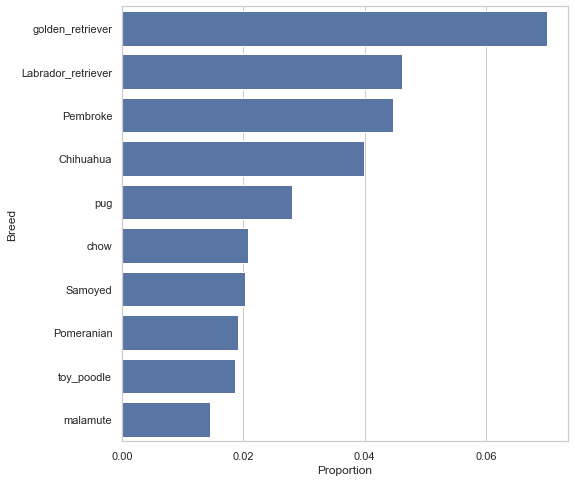

In [61]:
from matplotlib import rcParams
sns.set_theme(style="whitegrid")

## bar color
base_color = sns.color_palette()[0]


# total number of counts of the variable excluding missing values for top 10 
total_counts = tweets_cleaned.breed_1.value_counts().sum()

##2: determine the frequencies for the categories
freq = tweets_cleaned.breed_1.value_counts()
all_freq = freq[0:10] ## top ten
order_b = all_freq.index

##3: determine the highest frequency
max_freq = all_freq[0]## highest is the first in the list

##4: compute the lenght of the longest bar in this variable i.e max proportion
prop_max =  max_freq / total_counts
##5: use numpy.arange to create a list of evenly spaced arrays that will act as the   percentage proportions.
tick_props = (np.arange(0,prop_max,0.02) )
tick_props

## 6: create a list of string values that willl act as the labels
## use list comprehension
tick_labels = ['{:0.2f}'.format(i) for  i in tick_props]

## plotting the data
sns.countplot( data = tweets_cleaned, y = 'breed_1', color = base_color,order = order_b)
## sett the ticks
plt.xticks(tick_props * total_counts,tick_labels)
plt.ylabel('Breed')
plt.xlabel("Proportion");
rcParams['figure.figsize'] = 8,8



In [ ]:
all_freq / total_counts

The golden retriever  was the most dominant dog breed in the dataset(7%) followed by  Labrador retriever and pembroke at 4.6% and 4.4% respectively.

### Number of likes and the dog breed

Text(0, 0.5, 'Dog breed')

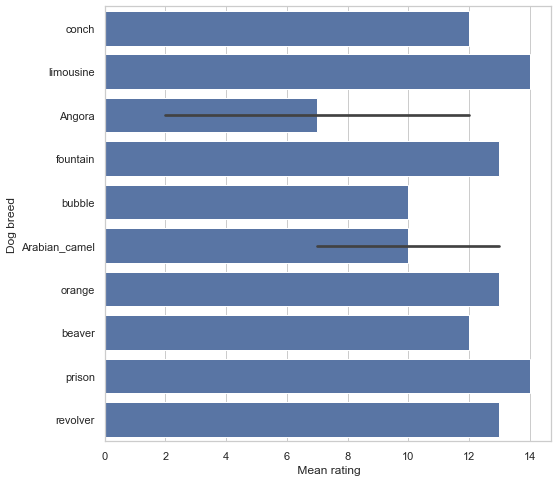

In [62]:
f = tweets_cleaned.groupby(['breed_1'])['total_likes'].mean().sort_values(ascending = False)[1:11]
order_f = f.index
sns.barplot(data = tweets_cleaned,y = 'breed_1',x = 'rating',color = base_color, order = order_f)
rcParams['figure.figsize'] = 5,5
plt.xlabel(' Mean rating')
plt.ylabel('Breed')

In [64]:
tweets_cleaned.groupby(['breed_1','p1_dog'])['rating'].mean().sort_values(ascending = False)[1:11]

breed_1                      p1_dog
microphone                   False     420.000000
soft-coated_wheaten_terrier  True       27.600000
teddy                        False      18.111111
West_Highland_white_terrier  True       15.642857
borzoi                       True       15.375000
Great_Pyrenees               True       14.928571
Labrador_retriever           True       14.101124
pole                         False      14.000000
pedestal                     False      14.000000
laptop                       False      14.000000
Name: rating, dtype: float64

In [65]:
## anova test for p1 and rating
anova_test('rating','breed_1',tweets_cleaned)

,df,sum_sq,mean_sq,F,PR(>F)
breed_1,366.0,9.515465e+05,2599.853694,1.664028,3.195227e-11
Residual,1561.0,2.438884e+06,1562.385339,NaN,NaN


The highest rated image was of a microscope.In terms of dogs,the soft coated wheaten terrier  and the clumber were the highest rated dogs with   mean rating of 27 followed by west highland wite terrier and the borzoi(15.4).The Labrador which was the second most dominant breed in the dataset had a mean rating of 14.The Anova results show that there significant differences between the rating an image receives and the breed of the dog( f value = 1.6614, pvalue  < 0.05).

## Image Prediction confidence interval and the type of image(Dog or not)

In [66]:
accuracy = tweets_cleaned.groupby(['breed_1','p1_dog'])['p1_conf'].mean().sort_values(ascending = False)
accuracy[1:30]

breed_1                   p1_dog
peacock                   False     0.999924
school_bus                False     0.999833
bib                       False     0.998814
slug                      False     0.998075
fountain                  False     0.997509
china_cabinet             False     0.996031
flamingo                  False     0.992710
fiddler_crab              False     0.992069
cowboy_boot               False     0.990253
electric_fan              False     0.984377
microwave                 False     0.981946
teapot                    False     0.981819
platypus                  False     0.974075
komondor                  True      0.972531
barbell                   False     0.971581
panpipe                   False     0.962572
sulphur-crested_cockatoo  False     0.960276
carton                    False     0.952613
clumber                   True      0.946718
otter                     False     0.945537
studio_couch              False     0.944692
mortarboard           

In [67]:
accuracy.iloc[-30:]

breed_1           p1_dog
hummingbird       False     0.180998
pool_table        False     0.179568
piggy_bank        False     0.176320
candle            False     0.174315
meerkat           False     0.172916
agama             False     0.172087
sundial           False     0.170921
hammer            False     0.169865
bow               False     0.168020
walking_stick     False     0.162179
crane             False     0.158859
mud_turtle        False     0.157477
radio_telescope   False     0.155279
laptop            False     0.153718
koala             False     0.152183
ocarina           False     0.148975
bonnet            False     0.146440
syringe           False     0.144712
limousine         False     0.130432
earthstar         False     0.127701
sandbar           False     0.118154
pitcher           False     0.117446
banana            False     0.107317
bald_eagle        False     0.097232
orange            False     0.097049
microphone        False     0.096063
Egyptian_cat 

Text(0, 0.5, 'confidence level')

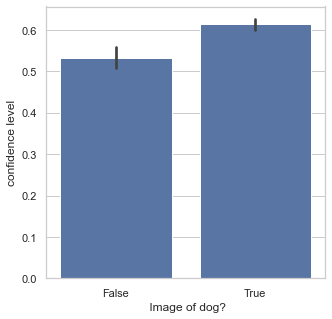

In [68]:
sns.barplot(data = tweets_cleaned,x= 'p1_dog',y= 'p1_conf',color = base_color)
rcParams['figure.figsize'] = 7,5
plt.xlabel(' Image of dog?')
plt.ylabel('confidence level')

In [69]:
## anova test for p1_config and p1_dog
anova_test('p1_conf','p1_dog',tweets_cleaned)

,df,sum_sq,mean_sq,F,PR(>F)
p1_dog,1.0,2.371102,2.371102,32.5108,1.368820e-08
Residual,1926.0,140.468465,0.072933,NaN,NaN


Top 30 images that had the highest prediction confidence level were mostly composed of nod dog related images. The barplot however,reveals that dog related images resulted in slightly higher confidence levels than non dog related images. Since the difference between the two types of images  is visually  small, Anova was used to test  whether there exist significant differences between the prediction rates between dog and non dog related images.The results confirm that there were significant differences between the prediction confidence levels and the type of image. 

## Conclusion

The image algorithm did fairly well in identifying the images. The prediction confidence interval for both dog and non-dog images was above 50%. From the identified images, the most dominant dog breed in the dataset was the Golden and Labrador Retrievers. There was no significant difference between the type of dog and the number of likes the image received. There were, however, significant differences between the type of dog and the rating value. Confidence intervals for the image recognition system also differed between non-dog and dog-related images


## Recommendations
        a)	Enhancement of the neural network through the provision of more training data to increase its accuracy in     differentiating between non-dog and dog images and if the image of a dog, the breed of the dog.

        b)	The gathering of more data and the removal of non-dog-related images from the final dataset to increase the accuracy of the statistics.
        
        
## Limitations

    a)	Outliers were not removed due to the significant impact on the number of data points.
    
    b)	There were errors in extracting more information from the Twitter archive to correct errors in some of the tweets.
